Getting Started with Cassini UVIS Occultation Plots in Python.
By Richard Jerousek April, 2020.
1. Import some necessary libraries:


In [88]:
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.interpolate as interpolate
import numpy as np
 

2. Read in an IDL .sav file as a python dictionary: We'll use this:
mydata = sio.readsav("Put your file path name here")
my file path name for the occultation of Alpha Arae on orbit 32 is:"/users/dik/desktop/fixed raw data/AlpAra032I_data_rad_phi_cpck_070318.sav"


In [89]:
mydata = sio.readsav("/users/dik/desktop/fixed raw data/AlpAra032I_data_rad_phi_cpck_070318.sav")

"mydata" is a python dictionary with the arrays "radius","data","et","lon",and "ringoccphi" contained within it.
To access one of the arrays in the dictionary use mydata["radius"] for example. Alternatively, we can access the "radius" array with mydata.radius

Let's shorten the names for these arrays so we don't have to type so much.

In [90]:
radius = mydata.radius
data = mydata.data
et = mydata.et
lon = mydata.lon
ringoccphi = mydata.ringoccphi

In python, when we set for example data = mydata.data we did NOT actually create a copy of the array. mydata is read-only. Let's try changing a value in data:

In [91]:
mydata.data[0] = 10
data[0] -= 1000


ValueError: assignment destination is read-only

Oops! You can see, we can't actually change data or mydata.data! This could be a good thing but if we want to be able to manipulate the arrays, we need to create a clone of the read-only arrays using the numpy function copy() Let's do this:

In [92]:
mydata = sio.readsav("/users/dik/desktop/fixed raw data/AlpAra032I_data_rad_phi_cpck_070318.sav")
radius = np.copy(mydata.radius)
data = np.copy(mydata.data)
et = np.copy(mydata.et)
lon = np.copy(mydata.lon)
ringoccphi = np.copy(mydata.ringoccphi)

Let's try modifying an element of the "lon" array this time:

In [93]:
print,lon[0]

(<function print>, 221.77334302315452)

In [94]:
lon[0] +=1

In [95]:
print,lon[0]

(<function print>, 222.77334302315452)

And we can put it back. We could just subtract 1 from lon[0] but let's suppose we forgot what we did to "lon"

In [96]:
lon = np.copy(mydata.lon)
print,lon[0]

(<function print>, 221.77334302315452)

3. Let's try to make a plot:

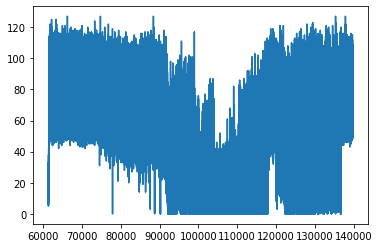

In [97]:
plt.plot(radius,data)
plt.show()

What a mess! There are waaay to many data to show in this little plot window. One datum every 30 m or so for 77,000 km! Let's zoom in to a smaller ring region to see just how high res. this data is. We'll look at the little dip about half way between 80000 and 90000 km. That's plateau P5. I'll put a couple red dots there to show you what I'm talking about:

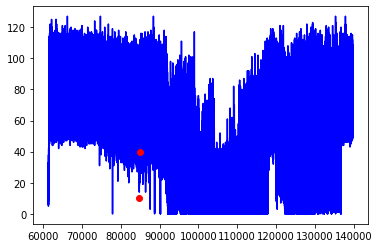

In [98]:
plt.plot(radius,data,'b-',[84750,84950],[10,40],'ro') # 'b-' means blue line and 'ro' means red dot.
plt.show()

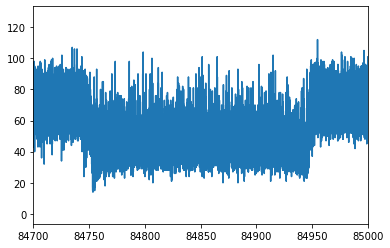

In [99]:
plt.xlim(84700,85000)
plt.plot(radius,data)
plt.show()

Okay, let's zoom in to the P5's outer edge. We'll also change the y-range

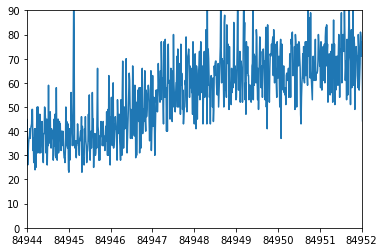

In [100]:
plt.xlim(84944,84952)
plt.ylim(0,90)
plt.plot(radius,data)
plt.show()

and more zooming...

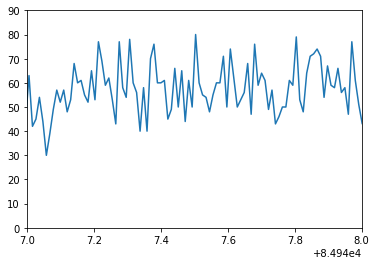

In [101]:
plt.xlim(84947,84948)
plt.ylim(0,90)
plt.plot(radius,data)
plt.show()

Now we can see the individual points. We should ALWAYS label our axis and maybe format the axis labels too:

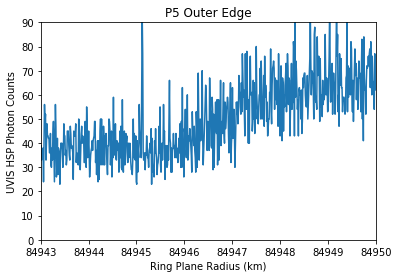

In [102]:
plt.xlabel("Ring Plane Radius (km)")
plt.ylabel("UVIS HSP Photon Counts")
plt.title("P5 Outer Edge")
plt.xlim(84943,84950)
plt.ylim(0,90)
plt.plot(radius,data)
plt.show()

Here's a nice tutorial on some stuff you can modify with your figures: https://matplotlib.org/tutorials/introductory/pyplot.html

We have to import some more stuff from matplotlib to change the tick format numbers on the x-axis from the MOST zoomed in plot (I still don't know how to do this, but I'll figure it out later. :) 

Let's move on and look at the 10 km binned data. These are saved in IDL "structures" called pdsdata (don't ask why, that's just what I called them). In IDL, to access an array in the structure we would type pdsdata.radius (for example) 

First we will read this other IDL .sav file using:

10kmdata = sio.readsav("Put your file path name for the 10km file here")
my file path name is:"/users/dik/desktop/Cassini Occ Data/UVIS 10 km/ALP ARA 032_UVIS_Ingress10km.sav"

In [103]:
binned_data = sio.readsav("/users/dik/desktop/Cassini Occ Data/UVIS 10 km/ALP ARA 032_UVIS_Ingress10km.sav")


Notice this is a different file then the one we used before. It ends in 10km.sav (10 km binned data)

we just put this structure in a dictionary called binned_data so to acess the "radius" array we would type:

In [104]:
binned_data.pdsdata.radius

array([array([ 61336.   ,  61346.   ,  61356.004, ..., 139757.   , 139767.   ,
       139777.   ], dtype=float32)], dtype=object)

It looks like python read this in as an array of arrays! 'radius' has dimensions 1xN where N is the number of data points. That 1 is not necessary so we can just pull out the 1-D array, "radius"

In [105]:
rad10km = binned_data.pdsdata.radius[0]

In [106]:
rad10km

array([ 61336.   ,  61346.   ,  61356.004, ..., 139757.   , 139767.   ,
       139777.   ], dtype=float32)

Now that is a 1-D array. Remember, if we would ever want to modify a number in the array we should create a clone of rad10km:

In [107]:
rad10km = np.copy(rad10km)

We're not going to change any of these arrays for a while so lets just call binned_data.pdsdata.array something more manageable.

In [108]:
rad10km = binned_data.pdsdata.radius[0]
dat10km = binned_data.pdsdata.dat[0]

Okay let's plot the zoomed-out raw data but this time, we'll overplot the 10 km binned data in red:

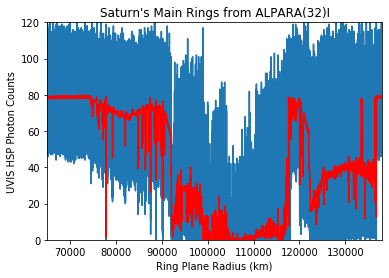

In [109]:
plt.xlabel("Ring Plane Radius (km)")
plt.ylabel("UVIS HSP Photon Counts")
plt.title("Saturn's Main Rings from ALPARA(32)I")
plt.xlim(65000,138000)
plt.ylim(0,120)
plt.plot(radius,data,rad10km,dat10km,'r-')
plt.show()

That's much less noisy! You can the the C ring, B ring, Cassini Division, and A ring. You can even see the Encke Gap near the outer edge of the A ring. 

Technically this isn't really "binned" data. It is averaged because we divided by the number of points in each bin. So the red data points are the average of all of the blue data points in each 10 km radial interval. There is another array in the "pdsdata" structure called "nbins" which is the number of data points in each bin. Let's plot it:

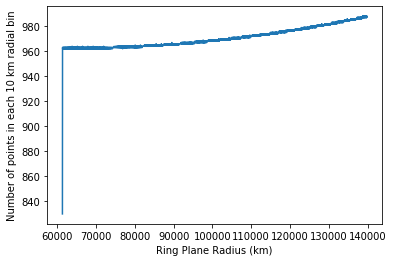

In [110]:
nbin10km = binned_data.pdsdata.nbins[0]
plt.xlabel("Ring Plane Radius (km)")
plt.ylabel("Number of points in each 10 km radial bin")
plt.plot(rad10km,nbin)
plt.show()

As you can see, there is a different number of points in each radial bin! This is NOT the same as binning temporily. If each measurement takes 1 ms and we binned 1000 points we would have the photon counts at 1s intervals and nbin would be 1000 for every point. That is easy to do. Since the occultation point in the rings doesn't move at a constant velocity purely in the radial (outward or egress) direction, we get a different number of points in each 10 km radial interval.

So to plot the binned data, we multiply dat10km by nbin10km, the number of points per bin:

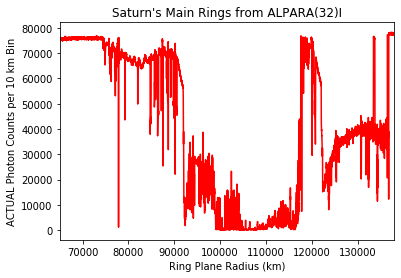

In [111]:
plt.xlabel("Ring Plane Radius (km)")
plt.ylabel("ACTUAL Photon Counts per 10 km Bin")
plt.title("Saturn's Main Rings from ALPARA(32)I")
plt.xlim(65000,138000)
plt.plot(rad10km,dat10km*nbin10km,'r-')
plt.show()

Wow! That's a lot more photons in each datum! We sacrificed radial resolution for a larger number of photons in each bin. Why would anyone do that? Because for photon counting statistics which follow a Poisson distribution, 1 standard deviation is always the squareroot of the mean number of photons. That means if the average number of photons in each bin is 100 then your standard deviation is 10, but if the average number of photons per bin is 10,000 then your standard deviation is 100. (100/10 = 10) < (10,000/100 = 100). Just by adding photons (increasing the bin size, we increased our signal-to-noise ratio by a factor of 10! That's why the red plot is sooo much less noisy looking than the blue plot of the raw data.

Take a look at the super zoomed-in plot we did a few steps back where you can see the individual raw data points. Try to estimate the mean and the standard deviation.

Okay, let's move on to plotting the transparency (the fraction of the incoming starlight that makes it through the rings). First, we need to get an estimate of how many photons we get from the star. We need to look somewhere where there are no ring particles blocking or scattering the light. Let's try the Encke gap:

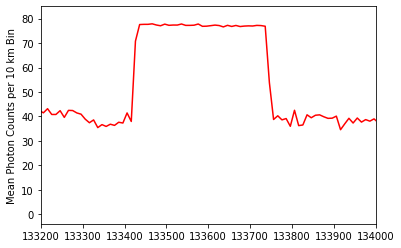

In [112]:
plt.ylabel("Mean Photon Counts per 10 km Bin")
plt.xlim(133200,134000)
plt.plot(rad10km,dat10km,'r-')
plt.show()

Let's try to average the value of the photon counts over the whole gap using the RAW data.
First we need to get the indices in the radius array that are within the Encke gap. I'm going to find those that are within 125 km of 133575 km (which appears to be the center from the plot above).

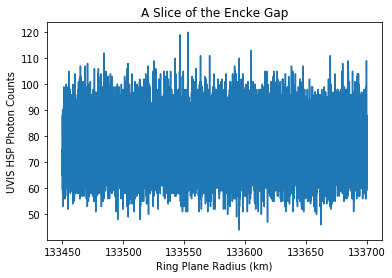

In [113]:
in_encke = np.where(abs(radius - 133575) <= 125)

#Let's check it out:
plt.xlabel("Ring Plane Radius (km)")
plt.ylabel("UVIS HSP Photon Counts")
plt.title("A Slice of the Encke Gap")
plt.plot(radius[in_encke],data[in_encke])
plt.show()


We'll average ALL of these data and call it Imax: (Note that python is CASE SeNsItIvE so I will always use a capital "I" in Imax)

In [114]:
Imax = np.mean(data[in_encke])
Imax

77.253303516975

Imax is the time-averaged maximum measured signal but there is light entering the instrument from elswhere: ringshine, Saturnshine, UV photons from interplanetary Hydrogen emission...

We call this background and we have to subtract it from Imax to get the unocculted star signal, I0. I0 = Imax - background will be the unocculted star signal without light from other sources.

We should look in the opaque portions of the B ring to estimate the background:

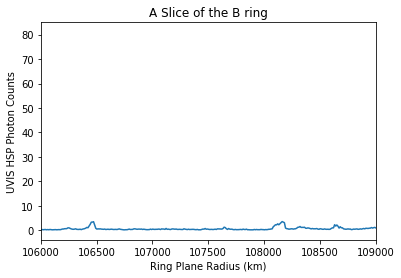

In [115]:
#Let's check it out:
plt.xlabel("Ring Plane Radius (km)")
plt.ylabel("UVIS HSP Photon Counts")
plt.title("A Slice of the B ring")
plt.xlim(106000,109000)
plt.plot(rad10km,dat10km)
plt.show()

That looks pretty opaque but I still see some structures in there which clearly are not the "shot noise" of background signal. I'll grad the points in the RAW data that are between them (within 750 km of 107250 km):

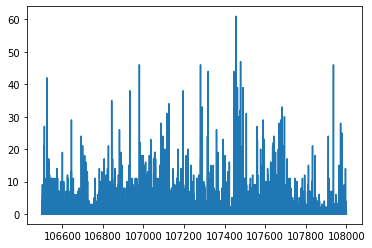

In [116]:
in_B_opaque = np.where(abs(radius - 107250) <= 750)
plt.plot(radius[in_B_opaque],data[in_B_opaque])
plt.show()

There are still some moderately high photon count levels in there. Let's grab that little bit between 107850 and 107900

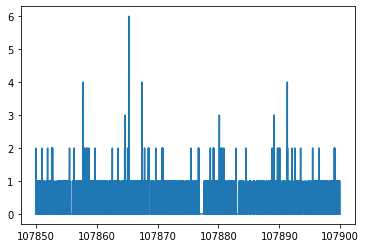

In [117]:
in_B_opaque = np.where(abs(radius - 107875) <= 25)
plt.plot(radius[in_B_opaque],data[in_B_opaque])
plt.show()

Now that looks like a background signal. Let's average these photons

In [118]:
background = np.mean(data[in_B_opaque])
background

0.16000823723228996

It isn't much but to be accurate, we should subtract this value from Imax to get the unocculted star signal, I0:

In [119]:
I0 = Imax - background
I0

77.0932952797427

Now we can plot transparency (T). The percentage of starlight that makes it through the rings. We have to subtract the background from the data too since it also has light from these unwanted sources mixed in.

In [120]:
T = (dat10km - background)/I0

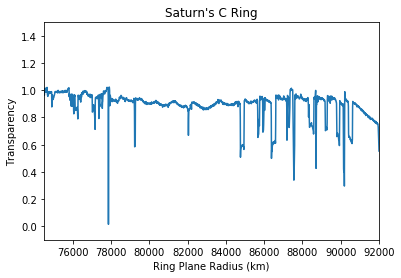

In [121]:
plt.xlabel("Ring Plane Radius (km)")
plt.ylabel("Transparency")
plt.title("Saturn's C Ring")
plt.xlim(74500,92000)
plt.ylim(-.1,1.5)
plt.plot(rad10km,T)
plt.show()

There you have it. The transparency of the C ring.